In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import shap

In [2]:
df = pd.read_csv(r"C:\Users\User\Documents\Data Science Practice\Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [4]:
dummies = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])
dummies

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,True,False,False,True,False,True,False,False,False
1,False,False,True,True,False,True,False,False,False
2,True,False,False,True,False,True,False,False,False
3,True,False,False,True,False,False,True,False,False
4,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
9995,True,False,False,False,True,True,False,False,False
9996,True,False,False,False,True,False,False,True,False
9997,True,False,False,True,False,False,False,False,True
9998,False,True,False,False,True,False,True,False,False


In [5]:
dummies.replace('True', 1)

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,True,False,False,True,False,True,False,False,False
1,False,False,True,True,False,True,False,False,False
2,True,False,False,True,False,True,False,False,False
3,True,False,False,True,False,False,True,False,False
4,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
9995,True,False,False,False,True,True,False,False,False
9996,True,False,False,False,True,False,False,True,False
9997,True,False,False,True,False,False,False,False,True
9998,False,True,False,False,True,False,True,False,False


In [6]:
dummies = dummies.replace({True: 1, False: 0})
dummies

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,0,0,1,0,1,0,0,0
1,0,0,1,1,0,1,0,0,0
2,1,0,0,1,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,1,0,0,0
9996,1,0,0,0,1,0,0,1,0
9997,1,0,0,1,0,0,0,0,1
9998,0,1,0,0,1,0,1,0,0


In [7]:
df1 = df.drop(['Geography', 'RowNumber', 'Gender', 'CustomerId', 'Surname', 'Card Type'], axis=1)

In [8]:
df = df1.join(dummies)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,...,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,...,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,...,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,...,339,0,1,0,0,1,0,1,0,0


In [9]:
df.dtypes

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Geography_France        int64
Geography_Germany       int64
Geography_Spain         int64
Gender_Female           int64
Gender_Male             int64
Card Type_DIAMOND       int64
Card Type_GOLD          int64
Card Type_PLATINUM      int64
Card Type_SILVER        int64
dtype: object

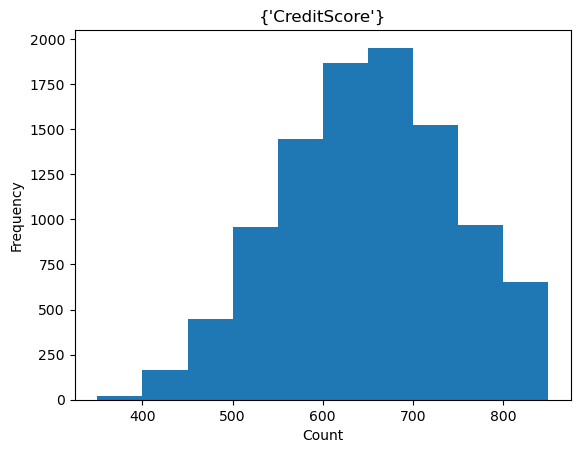

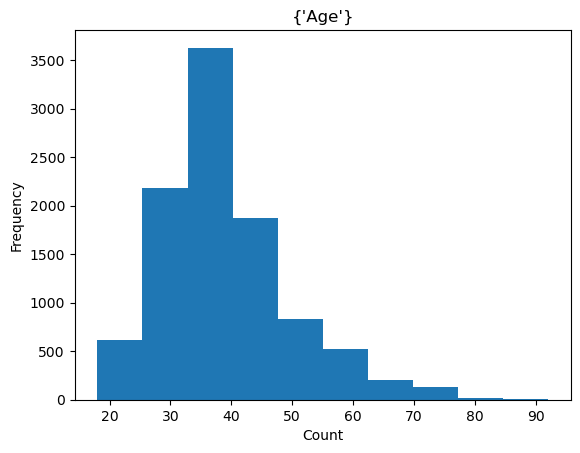

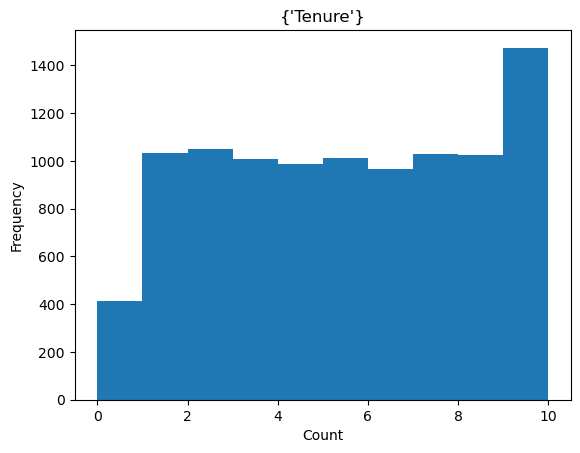

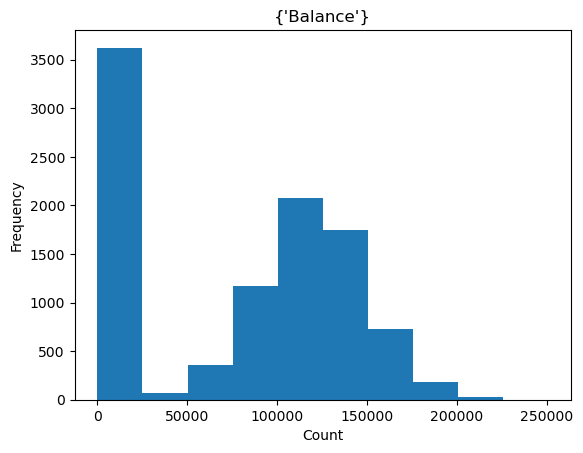

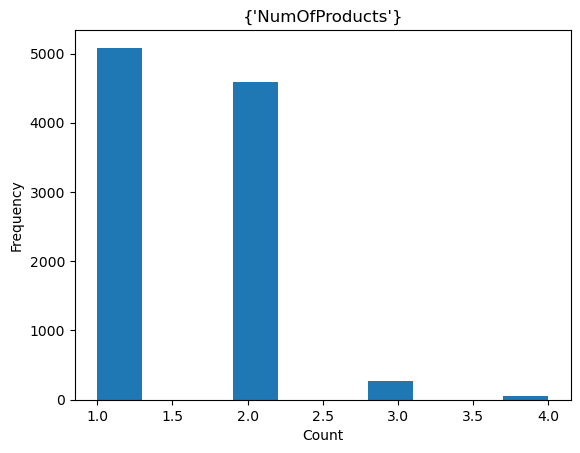

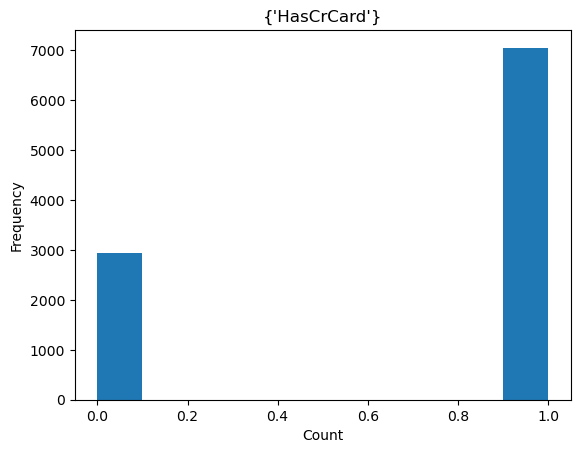

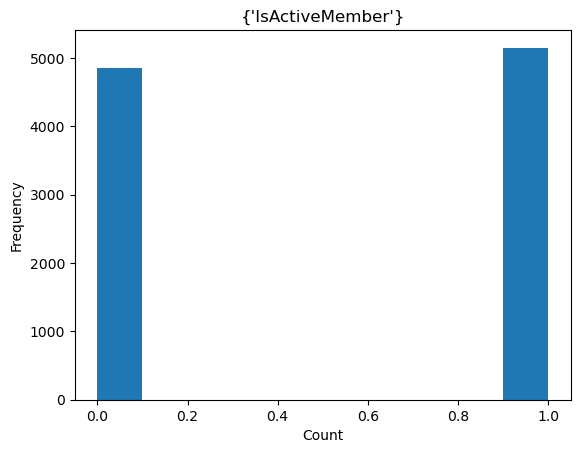

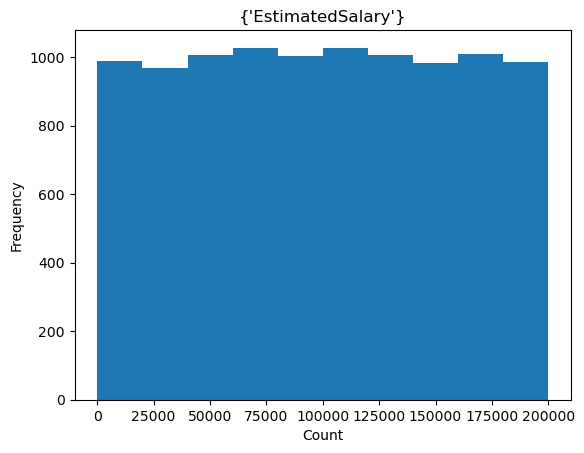

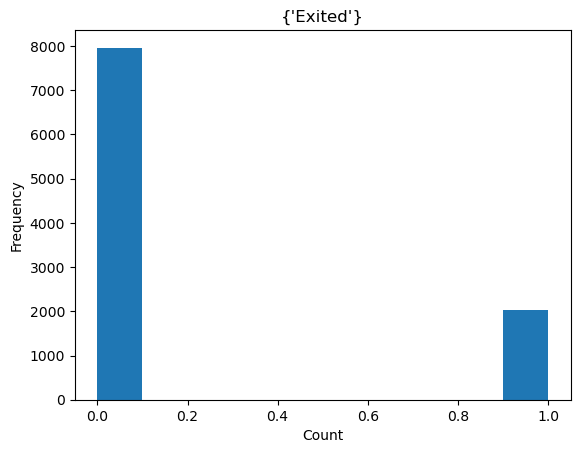

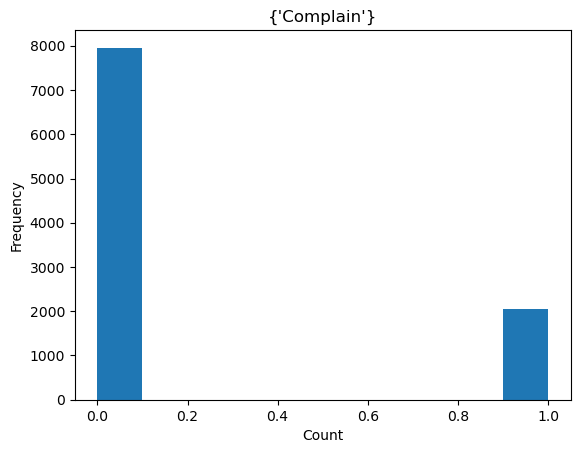

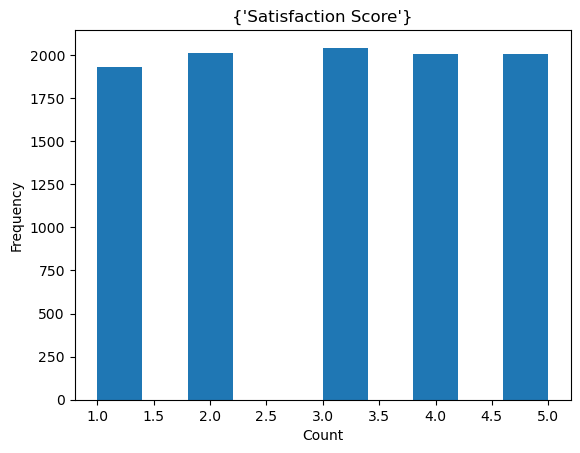

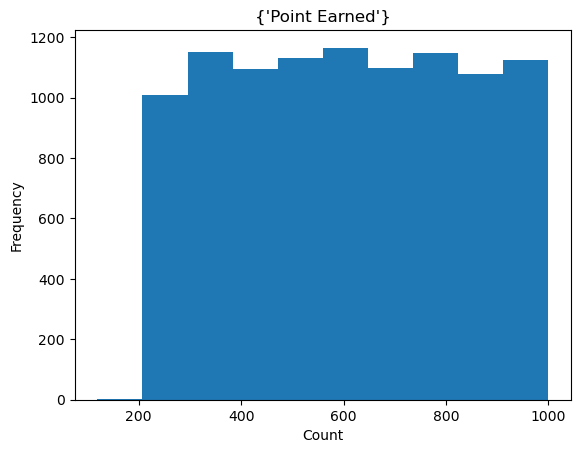

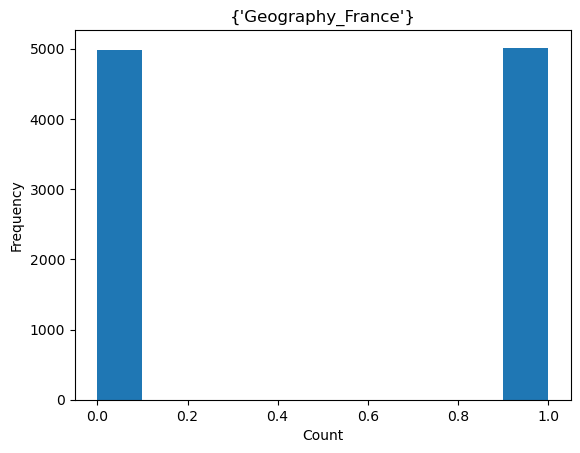

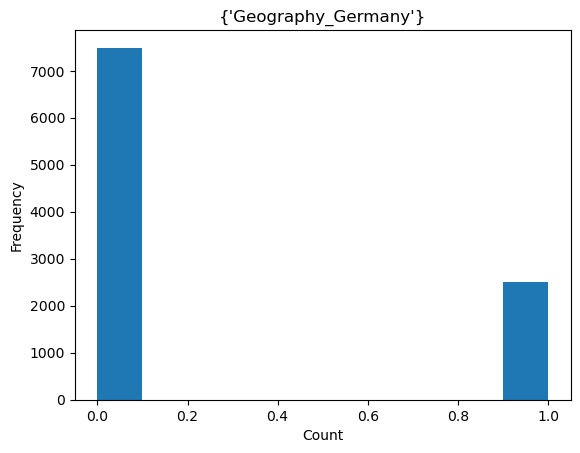

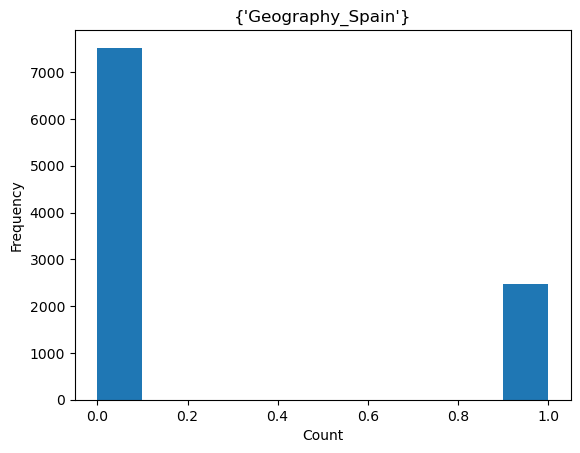

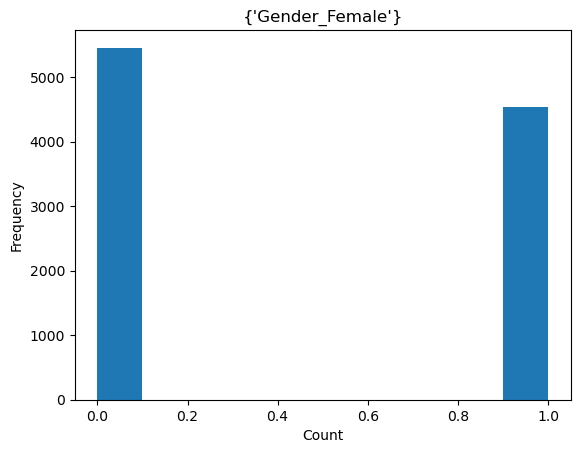

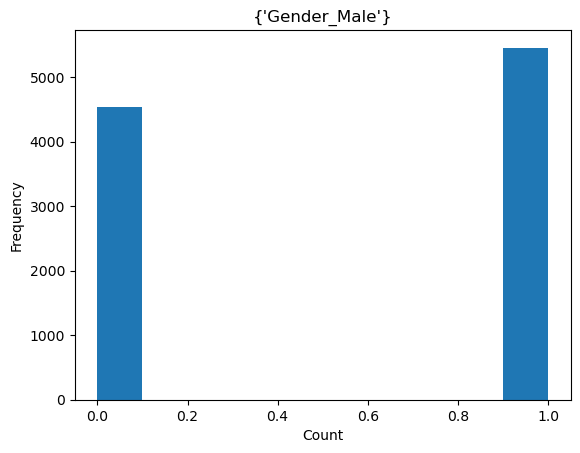

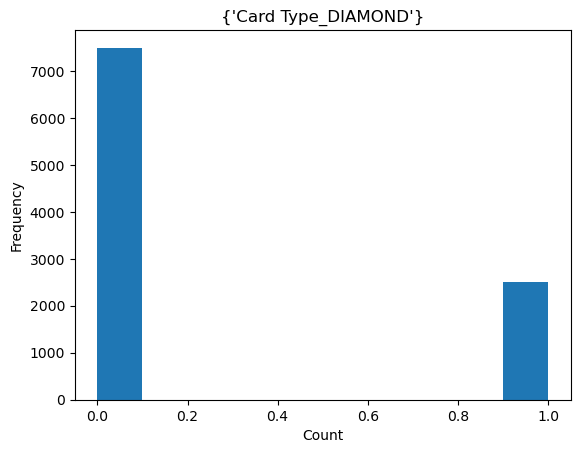

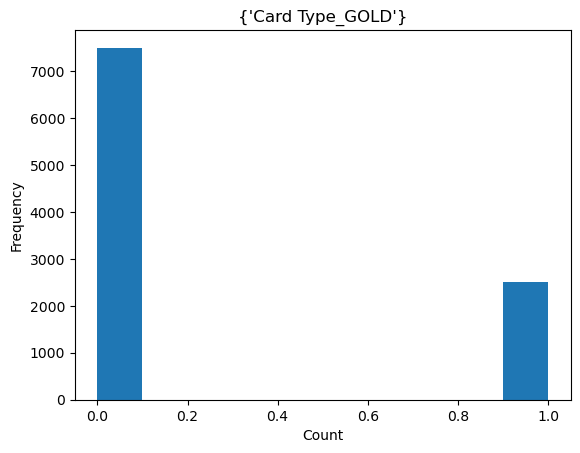

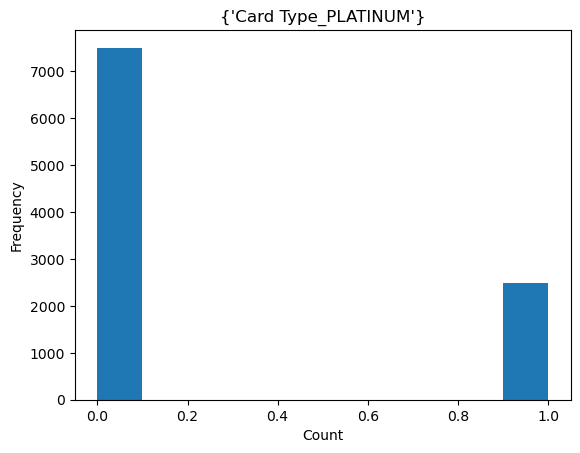

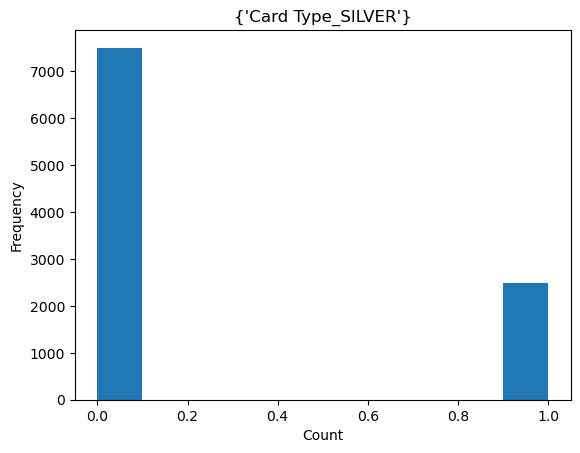

In [10]:
for i in df.columns:
    plt.hist(df[i])
    plt.ylabel('Frequency')
    plt.xlabel('Count')
    plt.title({i})
    plt.show()

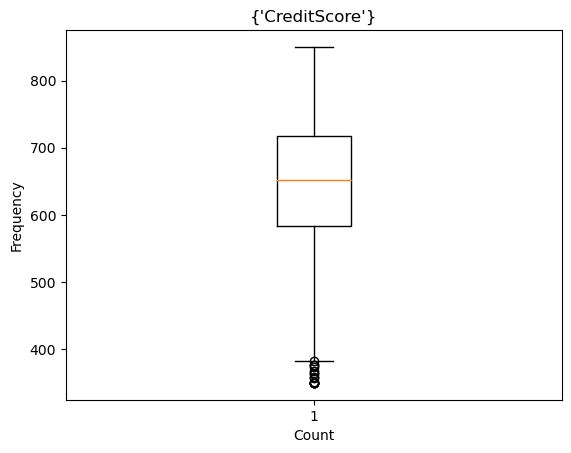

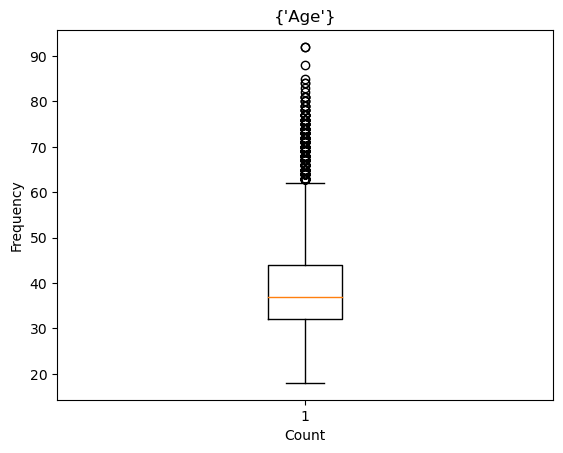

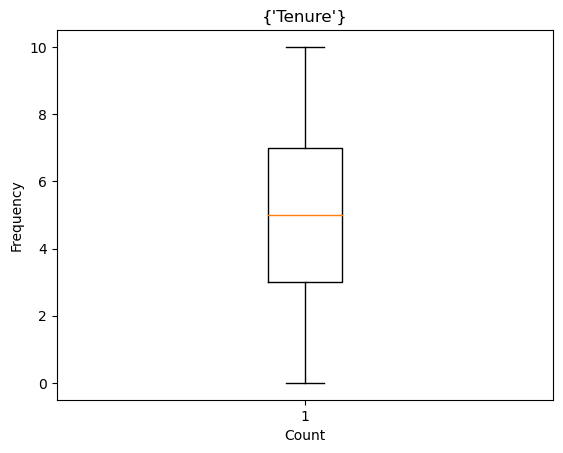

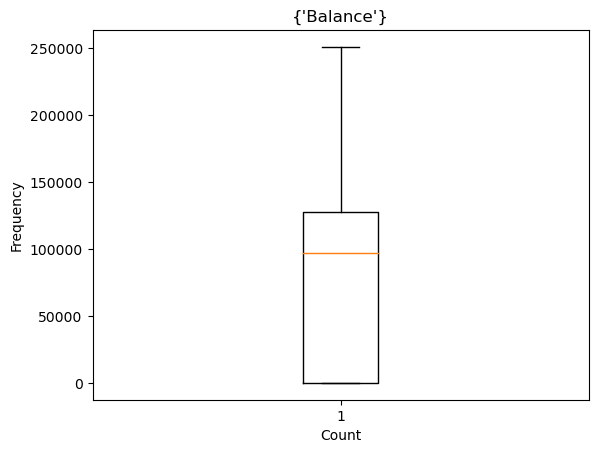

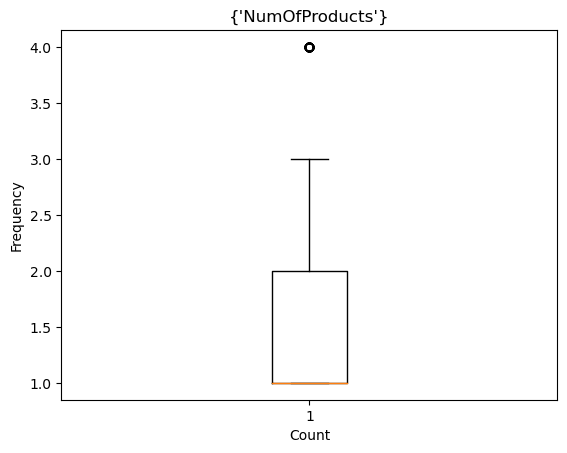

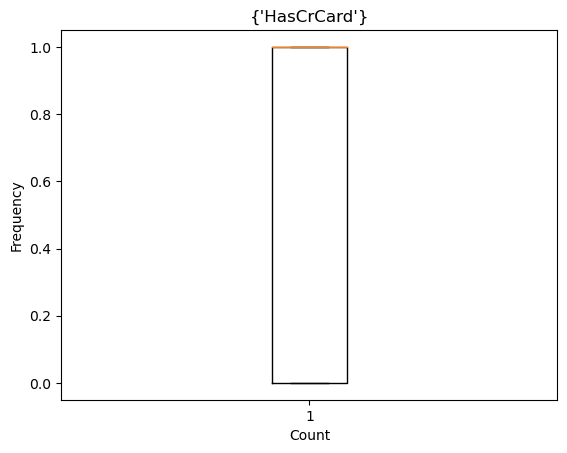

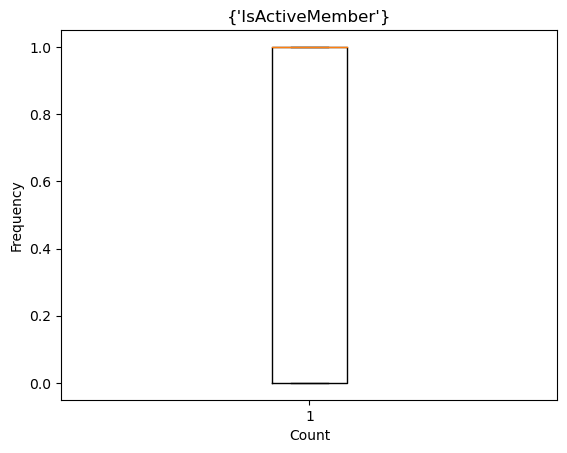

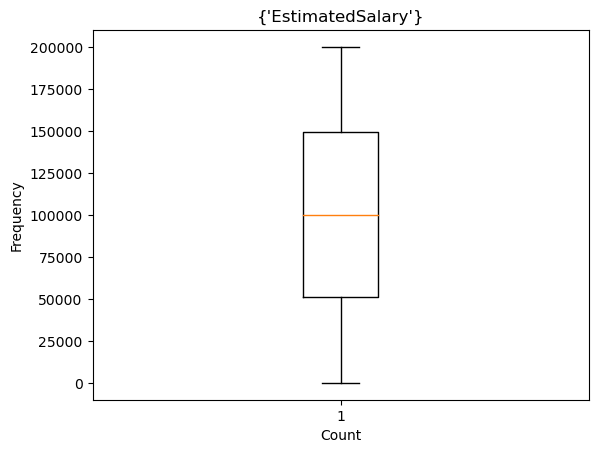

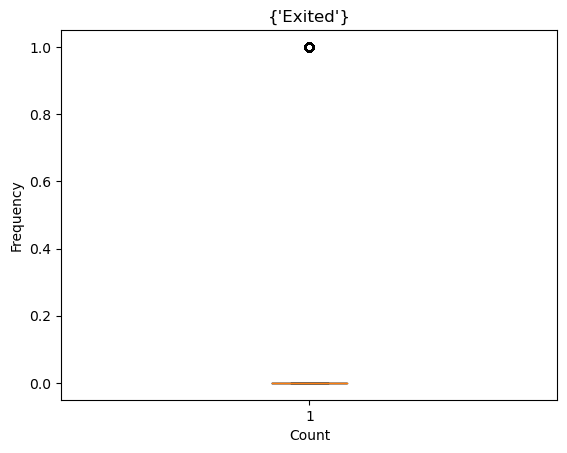

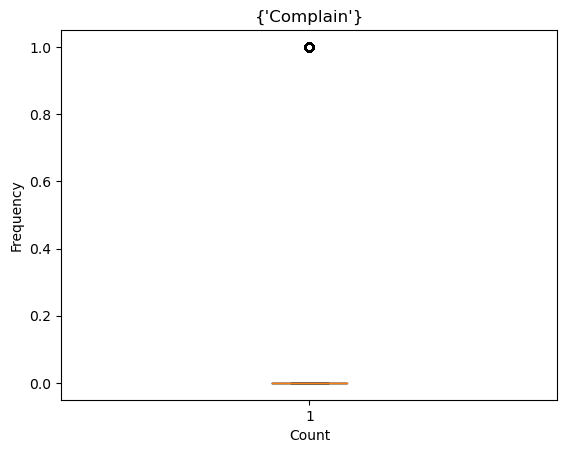

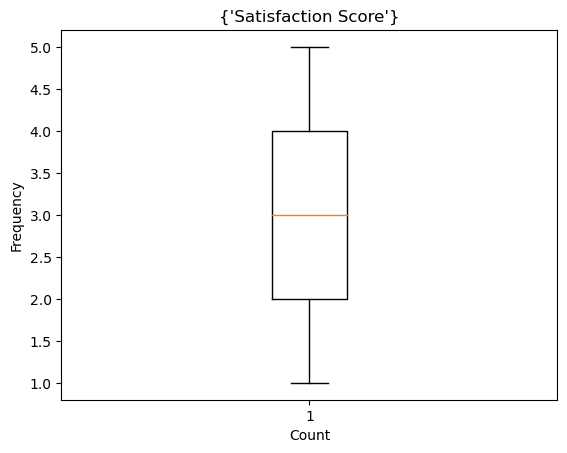

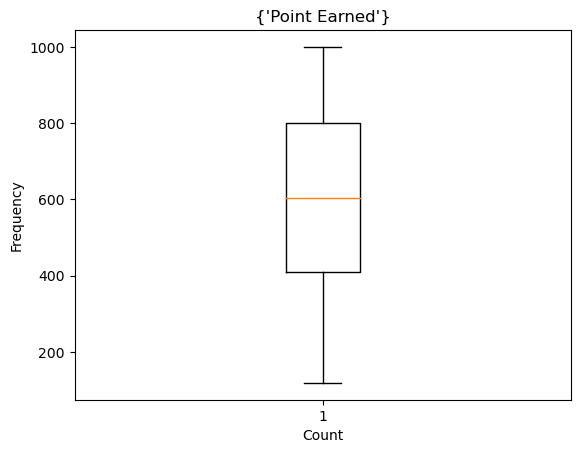

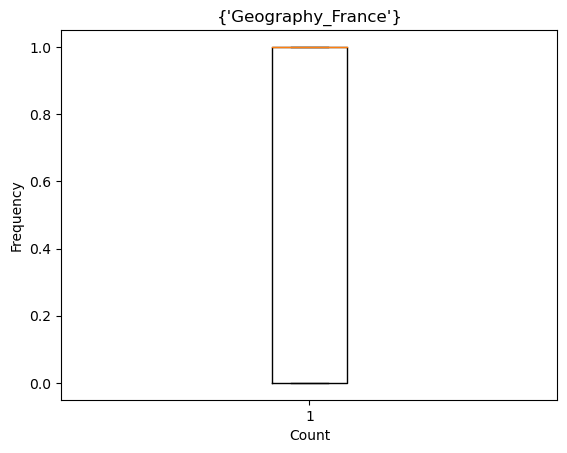

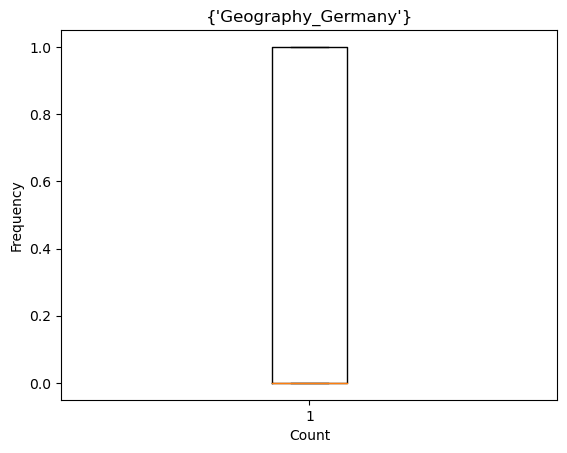

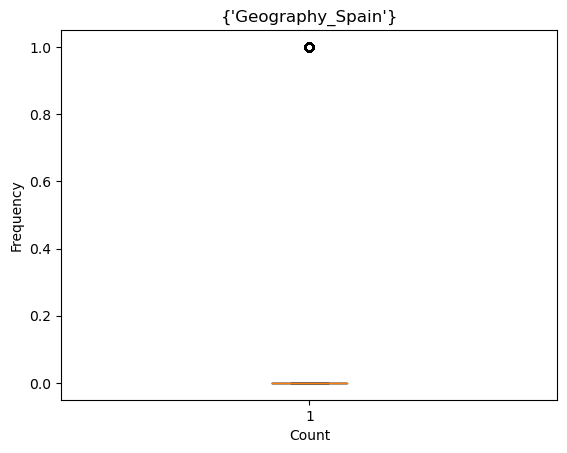

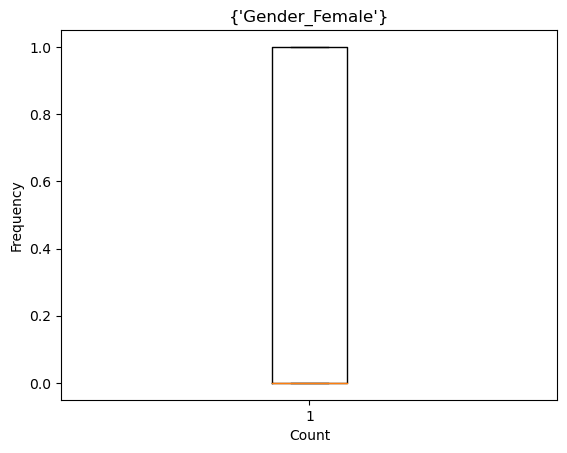

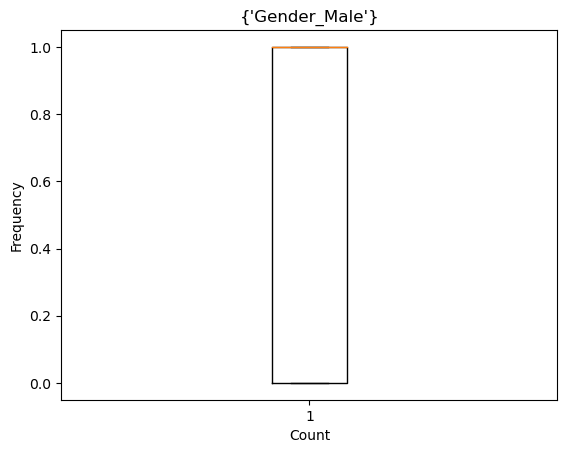

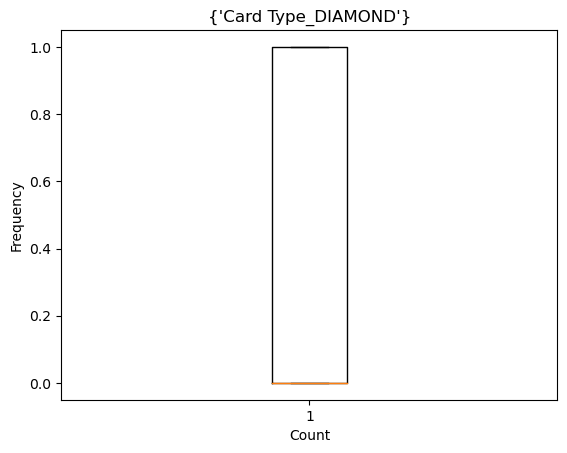

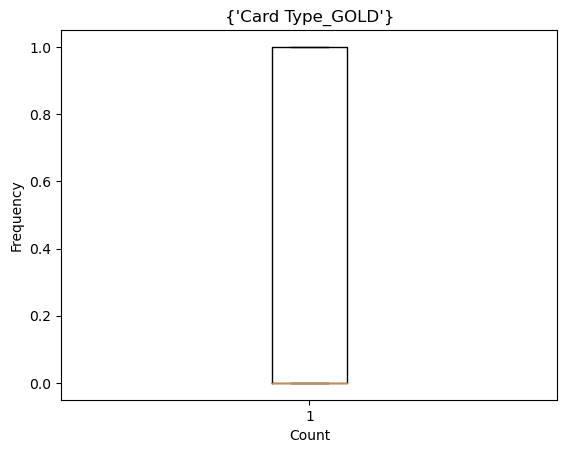

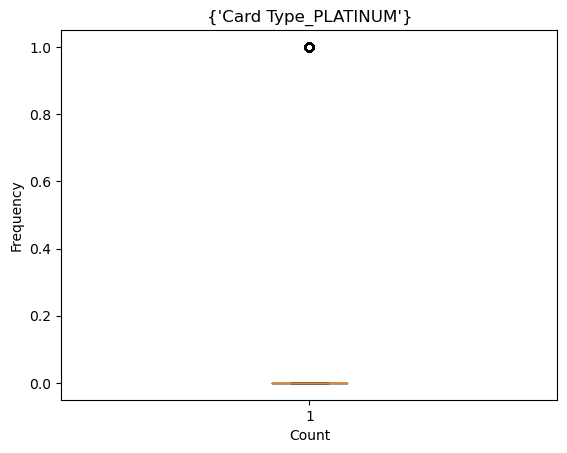

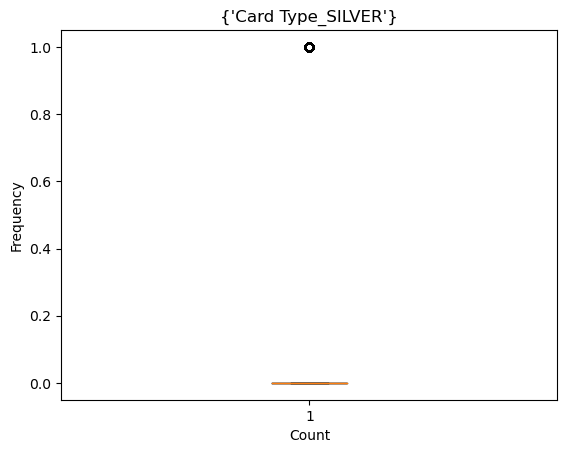

In [11]:
for i in df.columns:
    plt.boxplot(df[i])
    plt.ylabel('Frequency')
    plt.xlabel('Count')
    plt.title({i})
    plt.show()

In [12]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [14]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

In [15]:
log_reg = LogisticRegression()

In [16]:
log_reg.fit(X_train_std, y_train)

LogisticRegression()

In [17]:
preds = log_reg.predict(X_test)
preds

X has feature names, but LogisticRegression was fitted without feature names


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [18]:
log_reg_acc = accuracy_score(preds, y_test)
log_reg_acc

0.6432

In [19]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1990
           1       0.24      0.36      0.29       510

    accuracy                           0.64      2500
   macro avg       0.53      0.54      0.53      2500
weighted avg       0.70      0.64      0.67      2500



In [20]:
explainer = shap.explainers.Linear(log_reg, X_train)
shap_values = explainer(X_train)

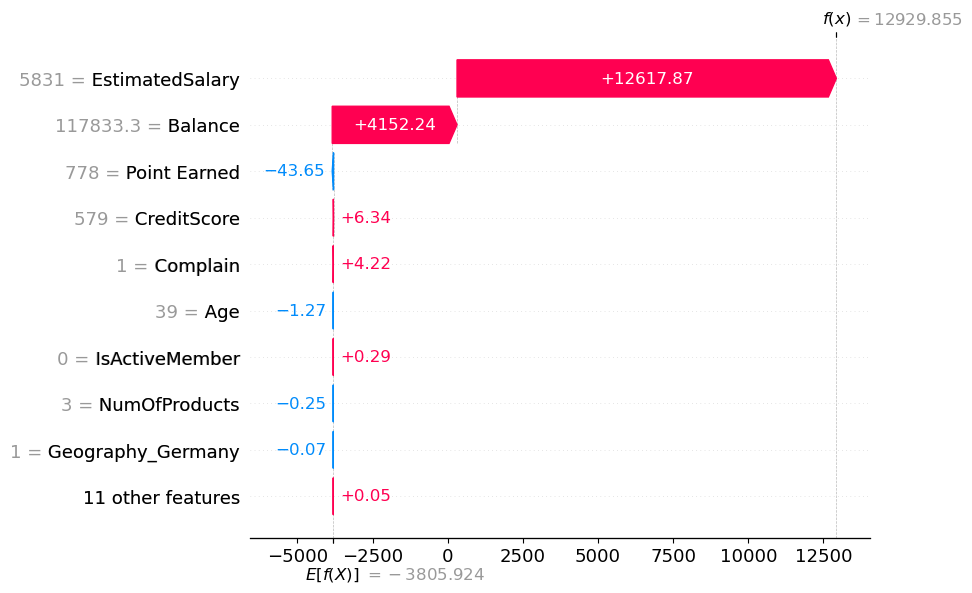

In [21]:
shap.plots.waterfall(shap_values[0])

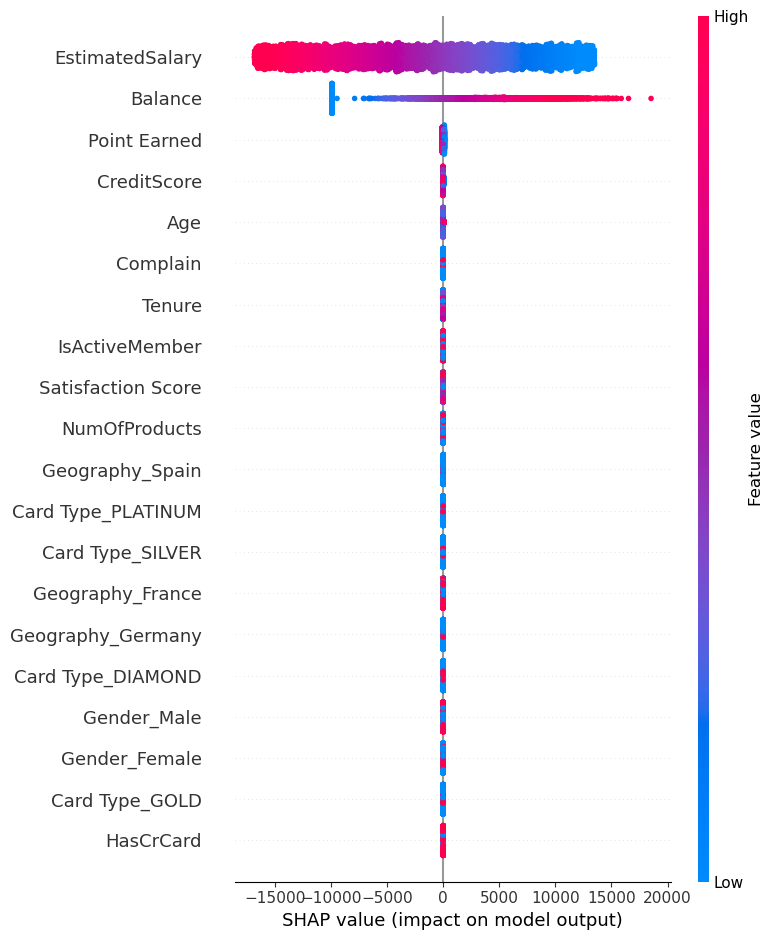

In [22]:
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns);

In [23]:
svm = SVC()

In [24]:
svm = svm.fit(X_train_std, y_train)
svm

SVC()

In [25]:
preds1 = svm.predict(X_test)
preds1

X has feature names, but SVC was fitted without feature names


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
svm_acc = accuracy_score(preds1, y_test)
svm_acc

0.204

In [27]:
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1990
           1       0.20      1.00      0.34       510

    accuracy                           0.20      2500
   macro avg       0.10      0.50      0.17      2500
weighted avg       0.04      0.20      0.07      2500



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [29]:
ds_tree = DecisionTreeClassifier()

In [30]:
tree_mod = ds_tree.fit(X_train_std, y_train)
tree_mod

DecisionTreeClassifier()

In [31]:
preds2 = tree_mod.predict(X_test)
preds2

X has feature names, but DecisionTreeClassifier was fitted without feature names


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
tree_acc = accuracy_score(preds2, y_test)
tree_acc

0.4948

In [33]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54      1990
           1       0.29      1.00      0.45       510

    accuracy                           0.49      2500
   macro avg       0.64      0.68      0.49      2500
weighted avg       0.85      0.49      0.52      2500



In [34]:
rand_f = RandomForestClassifier()

In [35]:
rand_f = rand_f.fit(X_train_std, y_train)
rand_f

RandomForestClassifier()

In [36]:
preds3 = rand_f.predict(X_test)
preds3

X has feature names, but RandomForestClassifier was fitted without feature names


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
rand_f_acc = accuracy_score(preds3, y_test)
rand_f_acc

0.9988

In [38]:
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1990
           1       1.00      1.00      1.00       510

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [39]:
ngb = GaussianNB()

In [40]:
ngb = ngb.fit(X_train_std, y_train)
ngb

GaussianNB()

In [41]:
preds4 = ngb.predict(X_test)
preds4

X has feature names, but GaussianNB was fitted without feature names


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
ngb_acc = accuracy_score(preds4, y_test)
ngb_acc

0.5516

In [43]:
print(classification_report(y_test, preds4))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1990
           1       0.15      0.25      0.19       510

    accuracy                           0.55      2500
   macro avg       0.46      0.44      0.44      2500
weighted avg       0.64      0.55      0.59      2500



In [44]:
xgb = XGBClassifier()

In [45]:
xgb = xgb.fit(X_train_std, y_train)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
preds5 = xgb.predict(X_test)
preds5

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
xgb_acc = accuracy_score(preds5, y_test)

In [48]:
print(classification_report(y_test, preds5))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1990
           1       0.00      0.00      0.00       510

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.63      0.80      0.71      2500



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [50]:
names = ("log_reg_acc", "svm_acc", "tree_acc", "rand_f_acc", "ngb_acc", "xgb_acc")
names

('log_reg_acc', 'svm_acc', 'tree_acc', 'rand_f_acc', 'ngb_acc', 'xgb_acc')

In [51]:
accuracies = (log_reg_acc, svm_acc, tree_acc, rand_f_acc, ngb_acc, xgb_acc)
accuracies

(0.6432, 0.204, 0.4948, 0.9988, 0.5516, 0.796)

<BarContainer object of 6 artists>

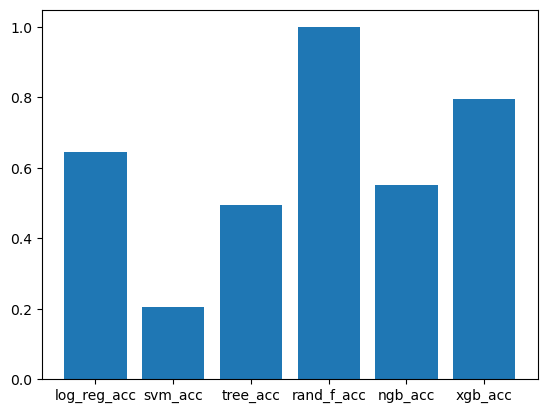

In [52]:
plt.bar(names, accuracies)